<a href="https://colab.research.google.com/github/yesseniafalconi/EPIC2/blob/main/homework_team_materials_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Homework: Python Basics
##Team Name: team_materials_2
##Team Members:
Erika Amanta, Rosa Estefania Almache Hernandez, Leonel Cabrera, Yessenia Falconí, León Ocaña.

## Instructions and initial task:

The purpose of this assignment is to find the characteristic index of the turbulence energy cascade of a snapshot taken from a subsonic turbulence simulation. The spectrum scales, so for simplicity we will work in code units.

You should upload the following simulation file (turbulence_sub_hr.vtk) to your Drive:

https://github.com/ciencialatitud0/EPIC_2/tree/main/Day1/Basics-2/homework/homework_data

**Please work with your team mates and produce a single python notebook per group.** When you finish, ask one of the group members to place the notebook onto the EPIC 2 github repository (we recommend to fork the repository, add the notebook to the Day1/Basics-2/homework/ in your account, and then do a pull request).

To get you started I have added a few lines to open the VTK simulation file and make a plot. First, you should reproduce this on Google Colab.

### Reference: 

https://github.com/ciencialatitud0/EPIC_2/blob/main/Day1/Basics-2/2d_python_II_CFDdata.ipynb

In [ ]:
# First let's mount our Drive folder:

from google.colab import drive
drive.mount('/content/drive')

# To display the contents

!ls "/content/drive/My Drive/homework_data/"

Mounted at /content/drive
turbulence_sub_hr.vtk


In [ ]:
# Then, we need to install pyvista

!pip install pyvista

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 5.1 MB/s 
     |████████████████████████████████| 79.3 MB 1.1 MB/s 


In [ ]:
# Import useful libraries

import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Indicate the working directory

input_directory="/content/drive/My Drive"
file_name = "turbulence_sub_hr.vtk"

In [ ]:
# Read the mesh

mesh = pv.read("/content/drive/MyDrive/turbulence_sub_hr.vtk")

print(mesh)

RectilinearGrid (0x7fef1a944c20)
  N Cells:	40000
  N Points:	40401
  X Bounds:	-2.000e+00, 2.000e+00
  Y Bounds:	-2.000e+00, 2.000e+00
  Z Bounds:	0.000e+00, 0.000e+00
  Dimensions:	201, 201, 1
  N Arrays:	5



In [ ]:
# Now, we read all the scalar and vector quantities

rho = pv.get_array(mesh, "rho", preference = 'cell') # density in code units
vx1 = pv.get_array(mesh, "vx1", preference = 'cell') # x velocity component in code units
vx2 = pv.get_array(mesh, "vx2", preference = 'cell') # y velocity component in code units
Bx1 = pv.get_array(mesh, "Bx1", preference = 'cell') # x magnetic field component in code units
Bx2 = pv.get_array(mesh, "Bx2", preference = 'cell') # y magnetic field component in code units

In [ ]:
# The above arrays are 1D, so we need to make them 2D
# To check you can run: print(rho.shape)

rho_2D = rho.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
vx1_2D = vx1.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
vx2_2D = vx2.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
Bx1_2D = Bx1.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
Bx2_2D = Bx2.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)

In [ ]:
# Create a 2D grid using metadata information

x = np.linspace(mesh.bounds[0], mesh.bounds[1], mesh.dimensions[0] - 1)
y = np.linspace(mesh.bounds[2], mesh.bounds[3], mesh.dimensions[1] - 1)

X, Y = np.meshgrid(x, y)

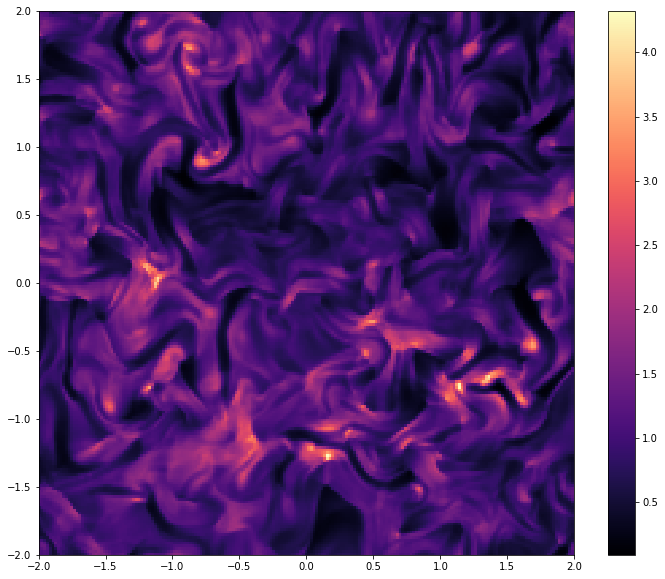

In [ ]:
# And we are ready to interpolate our data onto the mesh:

plt.figure(figsize = (12,10))

Z = plt.pcolor(X, Y, rho_2D, cmap = 'magma')

plt.colorbar(Z)

plt.show()

# TASK 1:

Calculate the kinetic energy density and make a 2D map of it. Recall that:

$E_k =\frac{1}{2}\rho\,v^2$,

so you need to calculate the velocity modulus first:

$v=\sqrt{v_x^2+v_y^2}$.

##Solution: Let's calculate the velocity modulus

In [ ]:
v = np.sqrt((vx1_2D**2)*(vx2_2D**2))

##Now, the kinetic energy density:

In [ ]:
Ek = (1/2)*rho_2D*(v**2)

# TASK 2: 

Carry out the 2D Fast Fourier Transform of the kinetic energy image that you produced above, and make a map of it.


### Reference:
https://github.com/ciencialatitud0/EPIC_2/blob/main/Day1/Basics-2/2b_fourier_transforms.ipynb

##Solution: 

In [ ]:
fourier_2D = np.fft.fft2(Ek)
print(fourier_2D)




fourier_2Dn = np.fft.fftshift(fourier_2D)

norm_fourier_2Dn = np.abs(fourier_2Dn)

[[3758.40430614  +0.j          381.00017334+389.43001715j
  -179.39279073-377.69089475j ... -168.36158317  -9.57098106j
  -179.39279073+377.69089475j  381.00017334-389.43001715j]
 [-521.88826346 -95.31888779j  -87.34198508 +47.56266795j
  -201.85400918+208.55899116j ...  281.98272979-132.56086583j
  -332.5520431 +429.94084188j -558.54872306-493.50466599j]
 [ -87.32244623-119.82600375j -141.53653279+381.10984114j
   -78.5407767 +151.50123322j ... -118.01119167+457.02477511j
    53.13672116+222.00585935j  255.24695419+226.57118577j]
 ...
 [ 102.61054584-213.51866495j -301.85027003+104.42874409j
    29.48142964+180.10981463j ...   65.17303401+229.5909064j
   193.13115314+148.28637373j  105.07302157 +86.83805915j]
 [ -87.32244623+119.82600375j  255.24695419-226.57118577j
    53.13672116-222.00585935j ... -550.1084799 -130.28054396j
   -78.5407767 -151.50123322j -141.53653279-381.10984114j]
 [-521.88826346 +95.31888779j -558.54872306+493.50466599j
  -332.5520431 -429.94084188j ...  461.5049

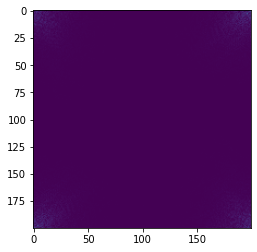

In [ ]:
%matplotlib inline

plt.imshow(np.abs(fourier_2D))

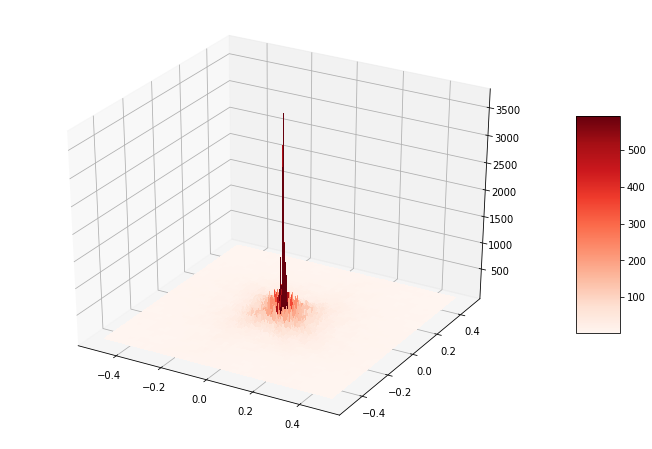

In [ ]:
freqs_x = np.fft.fftfreq(fourier_2D.shape[0])
freqs_y = np.fft.fftfreq(fourier_2D.shape[1])

freqs_X, freqs_Y = np.meshgrid(sorted(freqs_x), sorted(freqs_y))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize= (12,8))
# Plot the surface.
surf = ax.plot_surface(freqs_X, freqs_Y, norm_fourier_2Dn, cmap = "Reds", linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)


plt.show()

# TASK 3: 

Use the function below to produce a 1D Fourier spectrum from the 2D Fourier image that you produced above. Make a log-log plot of the 1D Fourier spetrum. You should get a plot similar to the sketch shown here (in the "cascade of turbulence" section):

https://github.com/ciencialatitud0/EPIC_2/blob/main/Day1/Basics-2/2c_python_II_lecture.ipynb

### Note:
The GetPSD1D() function calculates the azimuthal summation and will allow you to test whether the spectrum of this turbulence snaphot follows Kolmogorov or not.





#Solution:

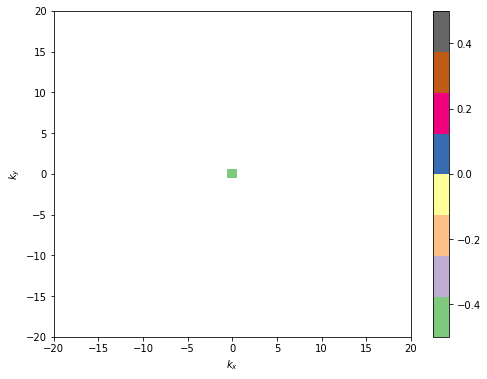

In [ ]:
plt.figure(figsize = (8,6))

Z1 = plt.pcolor(freqs_X, freqs_Y, np.log10((2/norm_fourier_2Dn.size)*norm_fourier_2Dn), cmap = "Accent", vmin = -0.5, vmax= 0.5)

plt.xlim(-20, 20)
plt.ylim(-20, 20)

plt.colorbar(Z1)

plt.xlabel(r"$k_x$")
plt.ylabel(r"$k_y$")

plt.show()

In [ ]:
slice_ky0 = np.log10((2/norm_fourier_2Dn.size)*norm_fourier_2Dn)[norm_fourier_2Dn.shape[0]//2,:]

slice_ky0_2 = ((2/norm_fourier_2Dn.size)*norm_fourier_2Dn)[199,:]

print(slice_ky0.shape)

(200,)


(-5.0, 5.0)

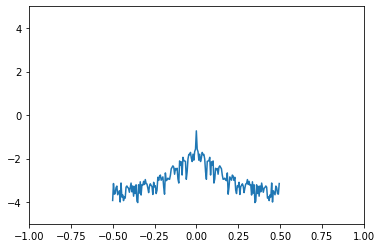

In [ ]:
%matplotlib inline

plt.plot(sorted(freqs_x),slice_ky0)

plt.xlim(-1, 1)
plt.ylim(-5, 5)

In [ ]:
from scipy import ndimage

In [ ]:
#===================================================================
# Get PSD 1D (total radial power spectrum)
#===================================================================
def GetPSD1D(psd2D):
    h  = psd2D.shape[0]
    w  = psd2D.shape[1]
    wc = w//2
    hc = h//2

    # create an array of integer radial distances from the center
    Y, X = np.ogrid[0:h, 0:w]
    r    = np.hypot(X - wc, Y - hc).astype(int)

    # SUM all psd2D pixels with label 'r' for 0<=r<=wc
    # NOTE: this will miss power contributions in 'corners' r>wc
    psd1D = ndimage.sum(psd2D, r, index=np.arange(0, wc))

    return psd1D
#===================================================================

# Taken from: https://medium.com/tangibit-studios/2d-spectrum-characterization-e288f255cc59

# TASK 4: 

Now that you have produced the 1D Fourier spectrum of the kinetic energy, label the plot identifying the turbulence generation, transfer, and dissipation regions. Finally, carry out a linear regression considering only the points associated with the inertial range. Does the spectrum follow Kolmogorov spectrum, $E_k \propto k^{-\frac{5}{3}}$?

### Reference:

https://github.com/ciencialatitud0/EPIC_2/blob/main/Day1/Basics-1/Sesion_1_Data_analysis_with_PythonI.ipynb

#Solution